In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Accuracy, Recall, Precision, AUC, TruePositives, TrueNegatives, FalseNegatives, FalsePositives
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf # Imports tensorflow


# from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, LSTM,Bidirectional,Attention,Concatenate
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, Bidirectional,Attention,Concatenate

from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Accuracy,Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
#from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import skimage.io
import skimage.color
import skimage.filters

In [2]:
images=[]
masks=[]
y=[]
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
out_dir = "lidc_kaggle/output"

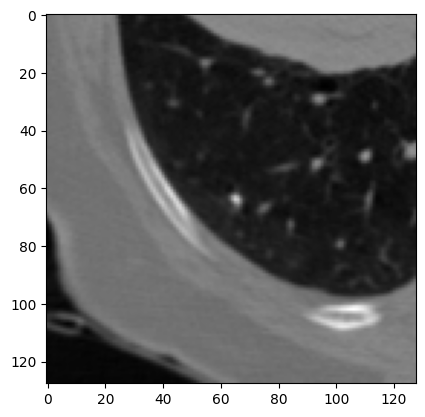

In [3]:
img=image.load_img('LIDC-IDRI-slices/LIDC-IDRI-0004/nodule-0/images/slice-1.png')
plt.imshow(img)
plt.show()

In [4]:
np.asarray(img).shape

(128, 128, 3)

In [5]:
np.array(images).shape

(0,)

In [6]:
np.array(masks).shape

(0,)

In [7]:
images=[]

y=[]
for nodule in os.listdir('LIDC-IDRI-slices/LIDC-IDRI-0001'):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/images/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-0/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-1/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-2/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob('LIDC-IDRI-slices/LIDC-IDRI-0001/'+nodule+'/mask-3/*.png'):
            print(filename)
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)


LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-7.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/images\slice-8.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-0.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-1.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-2.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-3.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-4.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-5.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-0\slice-6.png
LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0

In [8]:
i=7
print(mask0[i].sum())
print(mask1[i].sum())
print(mask2[i].sum())
print(mask3[i].sum())

465885
230265
292995
364905


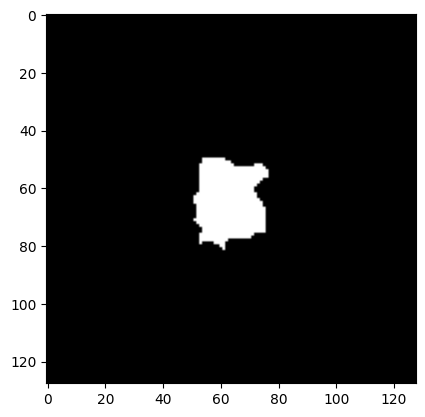

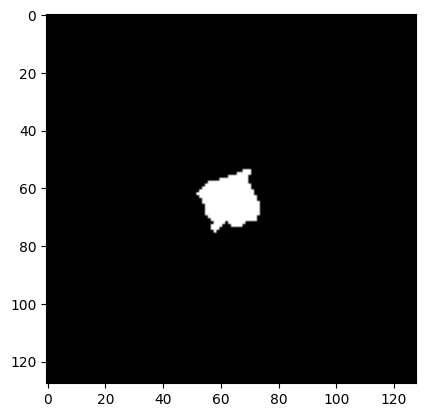

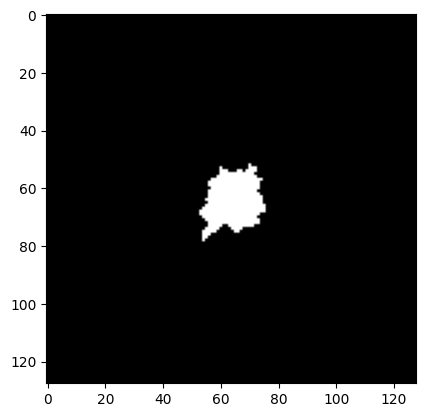

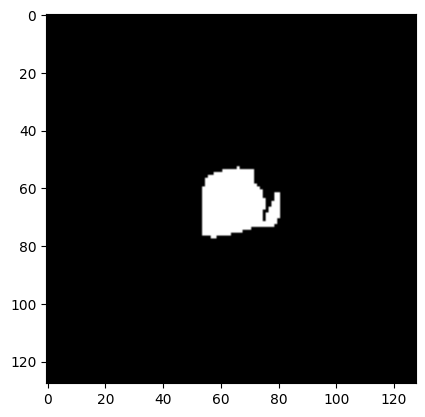

In [9]:
plt.imshow(mask0[i])
plt.show()
plt.imshow(mask1[i])
plt.show()
plt.imshow(mask2[i])
plt.show()
plt.imshow(mask3[i])
plt.show()

In [10]:
Thres = 100000

In [11]:
gmask=[]
for i in range(len(mask0)):
    white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
    cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
    print(cnt)
    if(cnt>2):
        print("ID ="+str(white_sum.argmax()))
        print(white_sum)

3
ID =0
[289935      0 102510 237915]
4
ID =0
[577575 398565 457470 509490]
4
ID =0
[648720 572985 561510 562275]
4
ID =0
[710685 688500 684675 681615]
4
ID =0
[694620 639540 635715 672435]
4
ID =0
[614295 563805 574515 596700]
4
ID =0
[515610 435285 481185 510255]
4
ID =0
[465885 230265 292995 364905]
0


In [12]:
gr_shape=(128,128,1)
img_shape = (128,128,3)
input_dir="LIDC-IDRI-slices"
images=[]
masks=[]
y=[]
y_test = []
y_pred = []
Thres = 1000

In [13]:
for patient in os.listdir(input_dir):
    for nodule in os.listdir(input_dir+'/'+patient):
        mask0=[]
        mask1=[]
        mask2=[]
        mask3=[]
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/images/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            images.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-0/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask0.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-1/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask1.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-2/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask2.append(img)
        for filename in glob(input_dir+'/'+patient+'/'+nodule+'/mask-3/*.png'):
            img = image.load_img(filename,target_size=img_shape)
            img = np.asarray(img)
            mask3.append(img)
        for i in range(len(mask0)):
            white_sum=np.array([mask0[i].sum(),mask1[i].sum(),mask2[i].sum(),mask3[i].sum()])
            cnt=int(mask0[i].sum()>Thres)+int(mask1[i].sum()>Thres)+int(mask2[i].sum()>Thres)+int(mask3[i].sum()>Thres)
            if(cnt>2):
                y.append(1)
                if white_sum.argmax()==0:
                    masks.append(mask0[i])
                elif white_sum.argmax()==1:
                    masks.append(mask1[i])
                elif white_sum.argmax()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])
            else:
                y.append(0)
                if white_sum.argmin()==0:
                    masks.append(mask0[i])
                elif white_sum.argmin()==1:
                    masks.append(mask1[i])
                elif white_sum.argmin()==2:
                    masks.append(mask2[i])
                else:
                    masks.append(mask3[i])


In [14]:
images = images[0:2500]
masks= masks[0:2500]
y= y[0:2500]

In [15]:
images=np.array(images)
masks=np.array(masks)
label=np.array(y)

In [16]:
print(images.shape)
print(masks.shape)
print(label.shape)

(2500, 128, 128, 3)
(2500, 128, 128, 3)
(2500,)


In [17]:
yy=pd.DataFrame(label)
yy.value_counts()

1    1360
0    1140
Name: count, dtype: int64

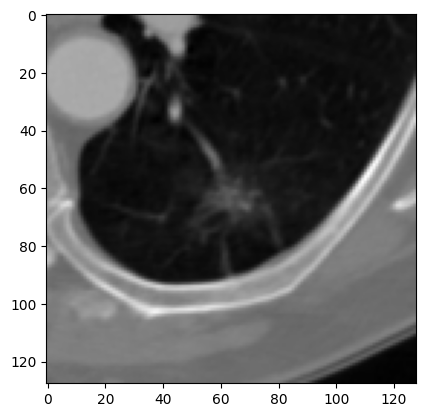

In [18]:
plt.imshow(images[0])

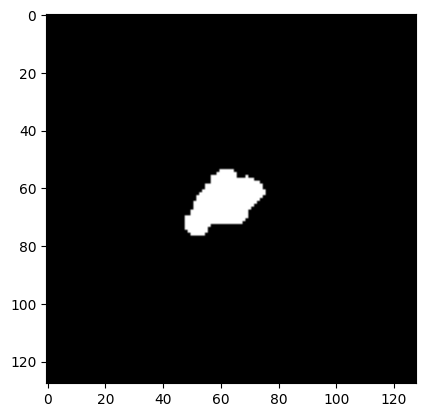

In [19]:
plt.imshow(masks[0])

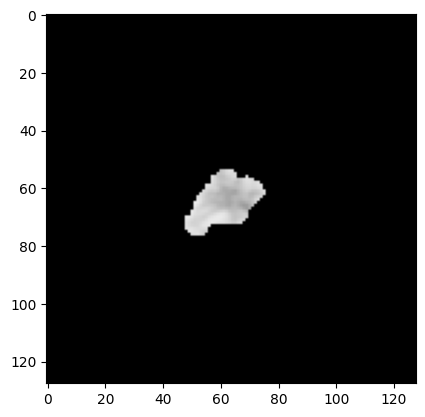

In [20]:
plt.imshow(images[0]*masks[0])

In [19]:
def blockred(inp,filters):
    x = Conv2D(filters, 1, activation="relu",padding='same',use_bias=False)(inp)
    x = layers.MaxPooling2D(2)(x)
    x = BatchNormalization(axis=1)(x)

    y = Conv2D(filters,1,activation="relu", padding='same',use_bias=False,)(inp)
    y = Conv2D(filters,3,activation="relu", padding='same',use_bias=False,)(y)
    y = layers.MaxPooling2D(2)(y)
    y = BatchNormalization(axis=1)(y)
    y = Dropout(0.25)(y)
    z = Conv2D(filters, 3, activation="relu", padding='same',use_bias=False)(inp)
    z = layers.MaxPooling2D(2)(z)
    z = BatchNormalization(axis=1)(z)
    output1 = layers.add([x,y,z])
    return output1

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
Name = "Seq3cnn"
inputs = keras.Input(shape=img_shape, name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization(axis=-1)(x)
x = Dropout(0.25)(x)

bl1=blockred(x,64)

y = blockred(bl1,128)
y = Conv2D(filters=128, kernel_size=(5, 5), activation='relu')(y)
y = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(y)
y = BatchNormalization(axis=-1)(y)
y = Dropout(0.25)(y)
y = Flatten()(y)
y = Dense(256, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(64, activation='relu')(y)
y = Dropout(0.5)(y)

In [23]:


# Rest of your code...

# Load pre-trained VGG16 model
base_model = VGG16(weights=r'C:\Users\user\Downloads\Ayesha_4_Model\lidc_irdi_complete_implementation\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=img_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())

# Rest of your code...


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [24]:

x_train, x_test, y_train, y_test = train_test_split(images, label, train_size=0.8, random_state=7)
print(x_train.shape)
print(y_train.shape)

(2000, 128, 128, 3)
(2000,)


In [25]:


model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
plot_model(model, to_file=Name+'.png', show_shapes=True, show_layer_names=True)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
32/32 [==============================] - 392s 12s/step - loss: 2.2372 - accuracy: 0.5195 - val_loss: 0.6751 - val_accuracy: 0.5580
Epoch 2/100
32/32 [==============================] - 606s 19s/step - loss: 0.9747 - accuracy: 0.5505 - val_loss: 0.6648 - val_accuracy: 0.6020
Epoch 3/100
32/32 [==============================] - 1297s 41s/step - loss: 0.7842 - accuracy: 0.5540 - val_loss: 0.6713 - val_accuracy: 0.6180
Epoch 4/100
32/32 [==============================] - 989s 31s/step - loss: 0.7352 - accuracy: 0.5685 - val_loss: 0.6715 - val_accuracy: 0.5880
Epoch 5/100
32/32 [==============================] - 1024s 32s/step - loss: 0.7198 - accuracy: 0.5725 - val_loss: 0.6630 - val_accuracy: 0.6200
Epoch 6/100
32/32 [==============================] - 966s 30s/step - loss: 0.7073 - accuracy: 0.5730 - val_loss: 0.6680 - val_accuracy

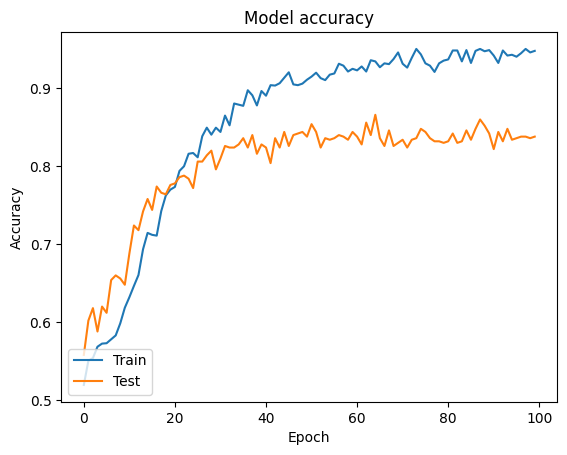

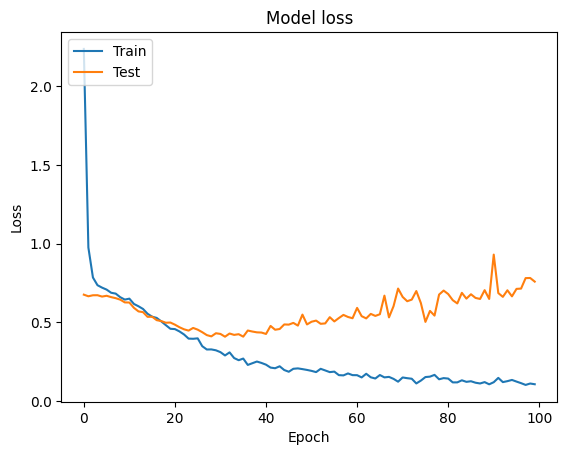

1/1 [==============================] - 9s 9s/step
Prediction: Class 0


In [26]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(Name+'accuracy.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(Name+'loss.png')
plt.show()

# Accept user input for image file path
image_path = 'LIDC-IDRI-slices/LIDC-IDRI-0001/nodule-0/mask-3/slice-7.png'

# Load the user-provided image
img = image.load_img(image_path, target_size=img_shape)
img = np.asarray(img)

# Perform inference on the loaded image
prediction = model.predict(np.expand_dims(img, axis=0))

# Display the prediction result
if prediction[0] > 0.5:
    print("Prediction: Class 1"),lllooooolo
else:
    print("Prediction: Class 0")


In [27]:
from sklearn.metrics import classification_report
# Make predictions on the test data
y_pred_prob = model.predict(x_test)
y_pred = np.round(y_pred_prob)  # Convert probabilities to class labels (0 or 1)

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

16/16 [==============================] - 261s 16s/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       236
           1       0.81      0.90      0.85       264

    accuracy                           0.84       500
   macro avg       0.84      0.83      0.84       500
weighted avg       0.84      0.84      0.84       500



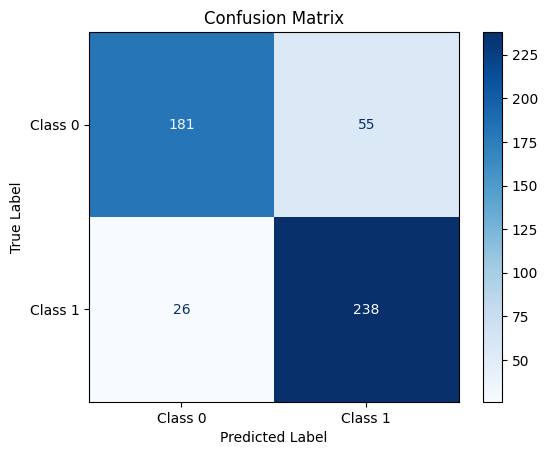

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

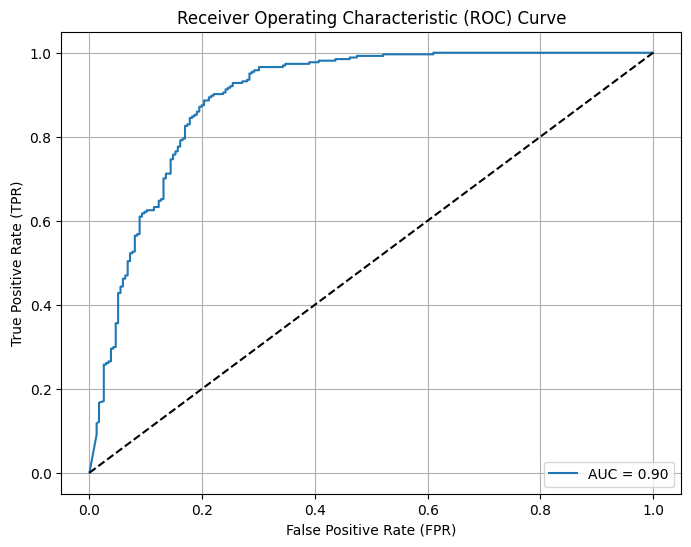

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()